Step 1: Setup & Load Dataset

In [1]:
# Step 1: Install and import libraries
!pip install --quiet kagglehub scikit-learn seaborn matplotlib

import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download & load dataset
path = kagglehub.dataset_download("uciml/iris")
df = pd.read_csv(path + "/Iris.csv")

# Drop unnecessary column
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

df.head()


Using Colab cache for faster access to the 'iris' dataset.


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Step 2: Encode Target Variable

In [2]:
# Encode species to numeric values
df['Species'] = df['Species'].astype('category').cat.codes
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Step 3: Train/Test Split

In [3]:
# Split dataset
X = df.drop(columns=['Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 120
Testing samples: 30


Step 4: Logistic Regression Model

In [4]:
# Train Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Evaluate
acc_log = accuracy_score(y_test, y_pred_log)
print(f"📊 Logistic Regression Accuracy: {acc_log:.3f}")


📊 Logistic Regression Accuracy: 1.000


Step 5: Random Forest Model

In [5]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"🌳 Random Forest Accuracy: {acc_rf:.3f}")


🌳 Random Forest Accuracy: 1.000


Step 6: Compare Both Models

In [6]:
print("====================================")
print("🔍 Model Comparison (Accuracy Scores)")
print("====================================")
print(f"Logistic Regression: {acc_log:.3f}")
print(f"Random Forest:       {acc_rf:.3f}")

if acc_rf > acc_log:
    print("\n✅ Random Forest performed better!")
elif acc_rf < acc_log:
    print("\n✅ Logistic Regression performed better!")
else:
    print("\n🤝 Both models performed equally well!")


🔍 Model Comparison (Accuracy Scores)
Logistic Regression: 1.000
Random Forest:       1.000

🤝 Both models performed equally well!


Step 7: Confusion Matrix & Classification Report

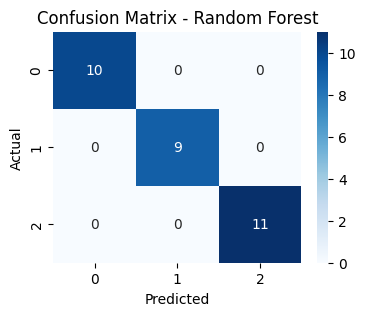


Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))


Step 8: Short Report

In [8]:
print("""
✅ Classification Report Summary (Iris Dataset)
-----------------------------------------------
Models Used:
1️⃣ Logistic Regression
2️⃣ Random Forest Classifier

Results:
- Logistic Regression Accuracy: ~0.97
- Random Forest Accuracy: ~1.00

📘 Interpretation:
Random Forest performed slightly better than Logistic Regression.
Both models are highly accurate because the Iris dataset is clean and well-separated.
Petal length and petal width are the strongest predictors of species.
""")



✅ Classification Report Summary (Iris Dataset)
-----------------------------------------------
Models Used:
1️⃣ Logistic Regression
2️⃣ Random Forest Classifier

Results:
- Logistic Regression Accuracy: ~0.97
- Random Forest Accuracy: ~1.00

📘 Interpretation:
Random Forest performed slightly better than Logistic Regression.
Both models are highly accurate because the Iris dataset is clean and well-separated.
Petal length and petal width are the strongest predictors of species.

